<a href="https://colab.research.google.com/github/gamountainmama/deep-learning-challenge/blob/main/AlphabetSoupCharity_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.2 MB/s eta 0:00:00


In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns='EIN')
application_df = application_df.drop(columns='NAME')

In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
app_count = application_df['APPLICATION_TYPE'].value_counts()
app_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_count[app_count<500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df['CLASSIFICATION'].value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_count_large = application_df['CLASSIFICATION'].value_counts().loc[lambda x: x>1]
class_count_large

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_count[class_count<1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
aff_count = application_df['AFFILIATION'].value_counts()
aff_count

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
affiliations_to_replace = list(aff_count[aff_count<1000].index)

# Replace in dataframe
for aff in affiliations_to_replace:
    application_df['AFFILIATION'] = application_df['AFFILIATION'].replace(aff,"Other")
    
# Check to make sure binning was successful
application_df['AFFILIATION'].value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [12]:
use_count = application_df['USE_CASE'].value_counts()
use_count

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [13]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
uses_to_replace = list(use_count[use_count<1000].index)

# Replace in dataframe
for use in uses_to_replace:
    application_df['USE_CASE'] = application_df['USE_CASE'].replace(use,"Other")
    
# Check to make sure binning was successful
application_df['USE_CASE'].value_counts()

Preservation    28095
ProductDev       5671
Other             533
Name: USE_CASE, dtype: int64

In [14]:
org_count = application_df['ORGANIZATION'].value_counts()
org_count

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [15]:
sp_con_count = application_df['SPECIAL_CONSIDERATIONS'].value_counts()
sp_con_count

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

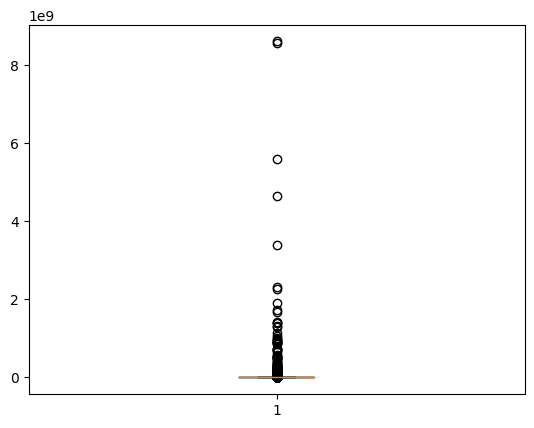

In [25]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt

# Example outlier plot of reaction times
ask_amt = application_df['ASK_AMT']
fig1, ax1 = plt.subplots()
ax1.boxplot(ask_amt)
plt.show()

In [26]:
# Determine which data points are outside of the 1.5*IQR range
quartiles = np.quantile(ask_amt,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)

potential_outliers = [x for x in ask_amt if x < lower_bound or x > upper_bound]
potential_outliers

[108590,
 142590,
 31452,
 7508025,
 94389,
 69656,
 165593,
 86380556,
 376109,
 318296,
 44004,
 323466,
 709815,
 1329410,
 31613,
 1549352,
 577113,
 44623,
 64868,
 131620,
 306133,
 66916,
 236206,
 393704,
 9955466,
 94869,
 36607,
 484855,
 137272,
 101980,
 4410503,
 15477,
 24211,
 638229,
 20520,
 34879,
 205120,
 12829,
 452970,
 72961,
 12860,
 696502,
 259589,
 49112,
 86584,
 4108874,
 25175802,
 132449,
 73686,
 723426,
 521883,
 855350,
 370941,
 1728949,
 287332,
 1790960,
 23799,
 201655,
 27285052,
 74643,
 640921,
 2705244,
 2770474,
 61686,
 1064584,
 25736,
 17512616,
 39064,
 67654,
 139694,
 212362,
 87981,
 16027,
 1066994,
 107484,
 20380,
 293732,
 2471994,
 2793433,
 324268,
 343650,
 497726,
 28993,
 118358,
 2257305,
 64723,
 403069,
 329188,
 180240,
 47901,
 23322,
 102050,
 25846,
 10935786,
 1562336,
 281725,
 122937,
 12753,
 410463,
 38286,
 22527,
 47129,
 966422,
 718228,
 2461713,
 876484,
 14698,
 110885,
 64075,
 78769,
 2908673,
 216643,
 1622

In [18]:
application_df = application_df.drop(columns='STATUS', axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,T3,Independent,C1000,Other,Trust,100000-499999,N,142590,1


In [19]:
# Convert categorical data to numeric with `pd.get_dummies`
num_data = pd.get_dummies(application_df)
num_data.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,108590,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,5000,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6692,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,142590,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [20]:
# Split our preprocessed data into our features and target arrays
X = num_data.drop('IS_SUCCESSFUL', axis=1).values
y = num_data['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_no = X_train_scaled.shape[1]

# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=50,
        step=5), activation=activation, input_dim=input_no))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=50,
            step=5),
            activation=activation))
    
    model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return model

In [23]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)

In [24]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test))

Trial 9 Complete [00h 00m 08s]
val_accuracy: 0.5292128324508667

Best val_accuracy So Far: 0.7321282625198364
Total elapsed time: 00h 01m 11s

Search: Running Trial #10

Value             |Best Value So Far |Hyperparameter
relu              |sigmoid           |activation
46                |41                |first_units
3                 |2                 |num_layers
6                 |1                 |units_0
36                |46                |units_1
36                |41                |units_2
36                |None              |units_3
26                |None              |units_4
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
3                 |3                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


KeyboardInterrupt: ignored

In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Export our model to HDF5 file
best_model.save('../h5_files/AlphabetSoupCharity_Optimization.h5')